1. 깃허브 자신의 계정에 수업과 숙제를 올린 소스코드만 참조가능

(그 외의 참조는 부정으로 간주 F처리)



데이터 로드  
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/car/car.data'
columns = ['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class']
data = pd.read_csv(url, names=columns)

데이터 확인  
print(data.head())

2. 해당 소스를 이용하여 ML 분류 RF, LR, DT

3. 해당 소스를 이용하여 FCNN

4. 해당 소스를 이용하여 CNN

5. 모든 소스에는 F1값 및 confusion matrix 표시

# Module Import

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from keras.models import Sequential
from keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout
from keras.optimizers import Adam

from sklearn.metrics import accuracy_score, confusion_matrix

# Data Import

In [2]:
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/car/car.data'
columns = ['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class']
data = pd.read_csv(url, names=columns)

data

,buying,maint,doors,persons,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc
...,...,...,...,...,...,...,...
1723,low,low,5more,more,med,med,good
1724,low,low,5more,more,med,high,vgood
1725,low,low,5more,more,big,low,unacc
1726,low,low,5more,more,big,med,good


# EDA 실행

## 결측치 확인

In [3]:
# 결측치 확인
data.isnull().sum()

buying      0
maint       0
doors       0
persons     0
lug_boot    0
safety      0
class       0
dtype: int64

## 클래스 갯수 확인 (그래프, 레이블 갯수)

Text(0.5, 1.0, 'Car class')

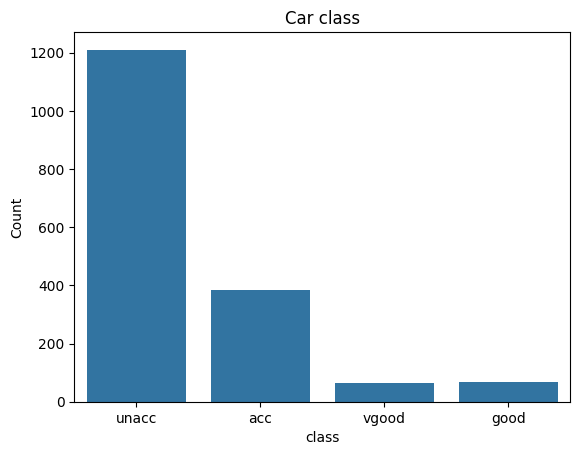

In [4]:
# 레이블 갯수 확인 (그래프)

sns.countplot(data = data, x="class")
plt.xlabel("class")
plt.ylabel("Count")
plt.title("Car class")

In [5]:
# 레이블 갯수 확인 (숫자)
data['class'].value_counts()

class
unacc    1210
acc       384
good       69
vgood      65
Name: count, dtype: int64

## 라벨 인코드

In [6]:
# LabelEncoder 객체 생성
label_encoder = LabelEncoder()

In [7]:
data.columns

Index(['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class'], dtype='object')

In [8]:
data['buying'].value_counts()

buying
vhigh    432
high     432
med      432
low      432
Name: count, dtype: int64

In [9]:
# 'label' 컬럼을 숫자로 변환
data['buying'] = label_encoder.fit_transform(data['buying'])

data['buying'].value_counts()

buying
3    432
0    432
2    432
1    432
Name: count, dtype: int64

In [10]:
data['maint'].value_counts()

maint
vhigh    432
high     432
med      432
low      432
Name: count, dtype: int64

In [11]:
# 'label' 컬럼을 숫자로 변환
data['maint'] = label_encoder.fit_transform(data['maint'])

data['maint'].value_counts()

maint
3    432
0    432
2    432
1    432
Name: count, dtype: int64

In [12]:
data['doors'].value_counts()

doors
2        432
3        432
4        432
5more    432
Name: count, dtype: int64

In [13]:
# 'label' 컬럼을 숫자로 변환
data['doors'] = label_encoder.fit_transform(data['doors'])

data['doors'].value_counts()

doors
0    432
1    432
2    432
3    432
Name: count, dtype: int64

In [14]:
# 'label' 컬럼을 숫자로 변환
data['persons'] = label_encoder.fit_transform(data['persons'])

data['persons'].value_counts()

persons
0    576
1    576
2    576
Name: count, dtype: int64

In [15]:
# 'label' 컬럼을 숫자로 변환
data['lug_boot'] = label_encoder.fit_transform(data['lug_boot'])

data['lug_boot'].value_counts()

lug_boot
2    576
1    576
0    576
Name: count, dtype: int64

In [16]:
# 'label' 컬럼을 숫자로 변환
data['safety'] = label_encoder.fit_transform(data['safety'])

data['safety'].value_counts()

safety
1    576
2    576
0    576
Name: count, dtype: int64

In [17]:
# 'label' 컬럼을 숫자로 변환
data['class'] = label_encoder.fit_transform(data['class'])

data['class'].value_counts()

class
2    1210
0     384
1      69
3      65
Name: count, dtype: int64

# Split X, Y

In [18]:
X = data.drop('class', axis = 1)
Y = data['class']

print(X.head())
print()
print(Y.value_counts())

   buying  maint  doors  persons  lug_boot  safety
0       3      3      0        0         2       1
1       3      3      0        0         2       2
2       3      3      0        0         2       0
3       3      3      0        0         1       1
4       3      3      0        0         1       2

class
2    1210
0     384
1      69
3      65
Name: count, dtype: int64


# Data Scaling

In [19]:
scaler = StandardScaler()
X_scaled_data = scaler.fit_transform(X)

X = pd.DataFrame(X_scaled_data,
                            index = X.index,
                            columns = X.columns) 

X

,buying,maint,doors,persons,lug_boot,safety
0,1.341641,1.341641,-1.341641,-1.224745,1.224745,0.000000
1,1.341641,1.341641,-1.341641,-1.224745,1.224745,1.224745
2,1.341641,1.341641,-1.341641,-1.224745,1.224745,-1.224745
3,1.341641,1.341641,-1.341641,-1.224745,0.000000,0.000000
4,1.341641,1.341641,-1.341641,-1.224745,0.000000,1.224745
...,...,...,...,...,...,...
1723,-0.447214,-0.447214,1.341641,1.224745,0.000000,1.224745
1724,-0.447214,-0.447214,1.341641,1.224745,0.000000,-1.224745
1725,-0.447214,-0.447214,1.341641,1.224745,-1.224745,0.000000
1726,-0.447214,-0.447214,1.341641,1.224745,-1.224745,1.224745


# Train데이터, Test데이터 나누기

In [20]:
# split X_train, Y_train, X_test, Y_test

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0)

# 모델 정의, 학습, 예측

In [21]:

# 모델 생성
model = Sequential()

# CNN 레이어 추가 (필터 크기와 커널 크기는 조정 가능)
model.add(Conv1D(filters=32, kernel_size=2, activation='relu', input_shape=(6, 1)))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(128, activation='relu'))
model.add(Dense(4, activation = "softmax"))

# 모델 컴파일
model.compile(Adam(learning_rate = 0.01), 'sparse_categorical_crossentropy', metrics = ['accuracy'])

# 모델 요약
model.summary()

c:\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d (Conv1D)                 │ (None, 5, 32)          │            96 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d (MaxPooling1D)    │ (None, 2, 32)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │         8,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 4)              │           516 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 13,092 (51.14 KB)

 Trainable params: 13,092 (51.14 KB)

 Non-trainable params: 0 (0.00 B)

In [22]:
model_history=model.fit(x=X_train, y=Y_train, epochs=30, batch_size=32,validation_data= (X_test,Y_test))
y_pred = model.predict(X_test)

# 예측 (가장 높은 확률의 클래스 선택)
y_pred = np.argmax(model.predict(X_test), axis=-1)

Epoch 1/30
44/44 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.6289 - loss: 0.8792 - val_accuracy: 0.6734 - val_loss: 0.7117
Epoch 2/30
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7094 - loss: 0.6767 - val_accuracy: 0.6647 - val_loss: 0.6124
Epoch 3/30
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7377 - loss: 0.5693 - val_accuracy: 0.7023 - val_loss: 0.6006
Epoch 4/30
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7239 - loss: 0.5636 - val_accuracy: 0.6879 - val_loss: 0.5997
Epoch 5/30
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7435 - loss: 0.5362 - val_accuracy: 0.6936 - val_loss: 0.6117
Epoch 6/30
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7320 - loss: 0.5528 - val_accuracy: 0.6705 - val_loss: 0.5521
Epoch 7/30
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7361 - loss: 0.5003 - val_accuracy: 0.6879 - val_loss: 0.5749
Epoch 8/30
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7440 - loss: 0.4951 - val_accuracy: 0.6792 - val_loss:

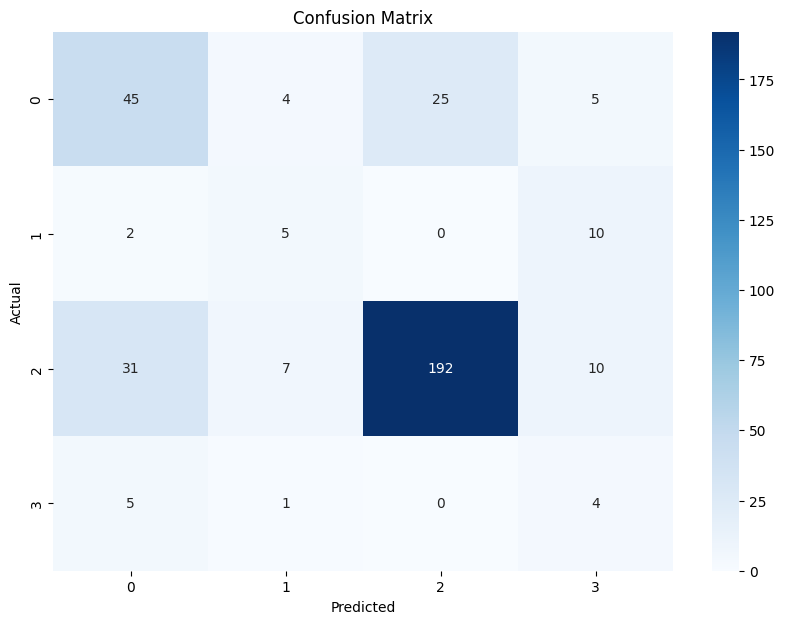

              precision    recall  f1-score   support

           0       0.54      0.57      0.56        79
           1       0.29      0.29      0.29        17
           2       0.88      0.80      0.84       240
           3       0.14      0.40      0.21        10

    accuracy                           0.71       346
   macro avg       0.46      0.52      0.47       346
weighted avg       0.76      0.71      0.73       346



In [23]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# 혼동 행렬
cm = confusion_matrix(Y_test, y_pred)

plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()

# 성능 보고서
print(classification_report(Y_test, y_pred))
